# Heart Disease Dataset - Exploratory Data Analysis

This notebook provides a comprehensive exploratory data analysis of the heart disease dataset, including statistical summaries, visualizations, and insights into the data patterns.

## Table of Contents
1. [Data Loading and Overview](#data-loading)
2. [Statistical Summary](#statistical-summary)
3. [Feature Distributions](#feature-distributions)
4. [Correlation Analysis](#correlation-analysis)
5. [Outlier Analysis](#outlier-analysis)
6. [Target Variable Analysis](#target-analysis)
7. [Feature-Target Relationships](#feature-target)
8. [Comprehensive Feature Relationships](#pairplot)
9. [Key Insights and Conclusions](#conclusions)

In [1]:
# Import required libraries
import sys
import os
sys.path.append('../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from eda_generator import EDAGenerator
import warnings
warnings.filterwarnings('ignore')

# Set plotting parameters
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
sns.set_style("whitegrid")

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Data Loading and Overview {#data-loading}

Let's start by loading the cleaned heart disease dataset and getting an overview of its structure.

In [2]:
# Initialize EDA Generator
eda = EDAGenerator(data_path="../data/processed/heart_disease_cleaned.csv")

# Load the data
data = eda.load_data()

# Display basic information about the dataset
print("Dataset Shape:", data.shape)
print("\nColumn Names:")
print(data.columns.tolist())
print("\nFirst 5 rows:")
data.head()

Data loaded successfully: 303 rows, 14 columns
Dataset Shape: (303, 14)

Column Names:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

First 5 rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1,1,145.0,233.0,1,2,150.0,0,2.3,3,0,6,0
1,67.0,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3,3,1
2,67.0,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2,7,1
3,37.0,1,3,130.0,250.0,0,0,187.0,0,3.5,3,0,3,0
4,41.0,0,2,130.0,204.0,0,2,172.0,0,1.4,1,0,3,0


In [3]:
# Display data types and basic info
print("Data Types:")
print(data.dtypes)
print("\nDataset Info:")
data.info()

Data Types:
age         float64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs           int64
restecg       int64
thalach     float64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null 

## 2. Statistical Summary {#statistical-summary}

Let's generate comprehensive statistical summaries for all features in the dataset.

In [4]:
# Generate statistical summary
stats_summary = eda.generate_statistical_summary()

# Display descriptive statistics
print("Descriptive Statistics:")
data.describe()

Descriptive Statistics:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.346535,245.584158,0.148515,0.990099,149.652640,0.326733,1.024422,1.600660,0.663366,4.722772,0.458746
std,9.038662,0.467299,0.960126,16.648749,47.558803,0.356198,0.994971,22.731735,0.469794,1.110127,0.616226,0.934375,1.938383,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,84.750000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,170.000000,371.000000,1.000000,2.000000,202.000000,1.000000,4.000000,3.000000,3.000000,7.000000,1.000000


In [5]:
# Check for missing values
print("Missing Values Analysis:")
missing_values = data.isnull().sum()
print(missing_values)
print(f"\nTotal missing values: {missing_values.sum()}")

Missing Values Analysis:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Total missing values: 0


In [6]:
# Display unique value counts for each feature
print("Unique Values per Feature:")
for col in data.columns:
    print(f"{col}: {data[col].nunique()} unique values")

Unique Values per Feature:
age: 41 unique values
sex: 2 unique values
cp: 4 unique values
trestbps: 44 unique values
chol: 148 unique values
fbs: 2 unique values
restecg: 3 unique values
thalach: 91 unique values
exang: 2 unique values
oldpeak: 36 unique values
slope: 3 unique values
ca: 4 unique values
thal: 3 unique values
target: 2 unique values


## 3. Feature Distributions {#feature-distributions}

Let's examine the distribution of numerical features to understand their patterns and identify potential outliers.

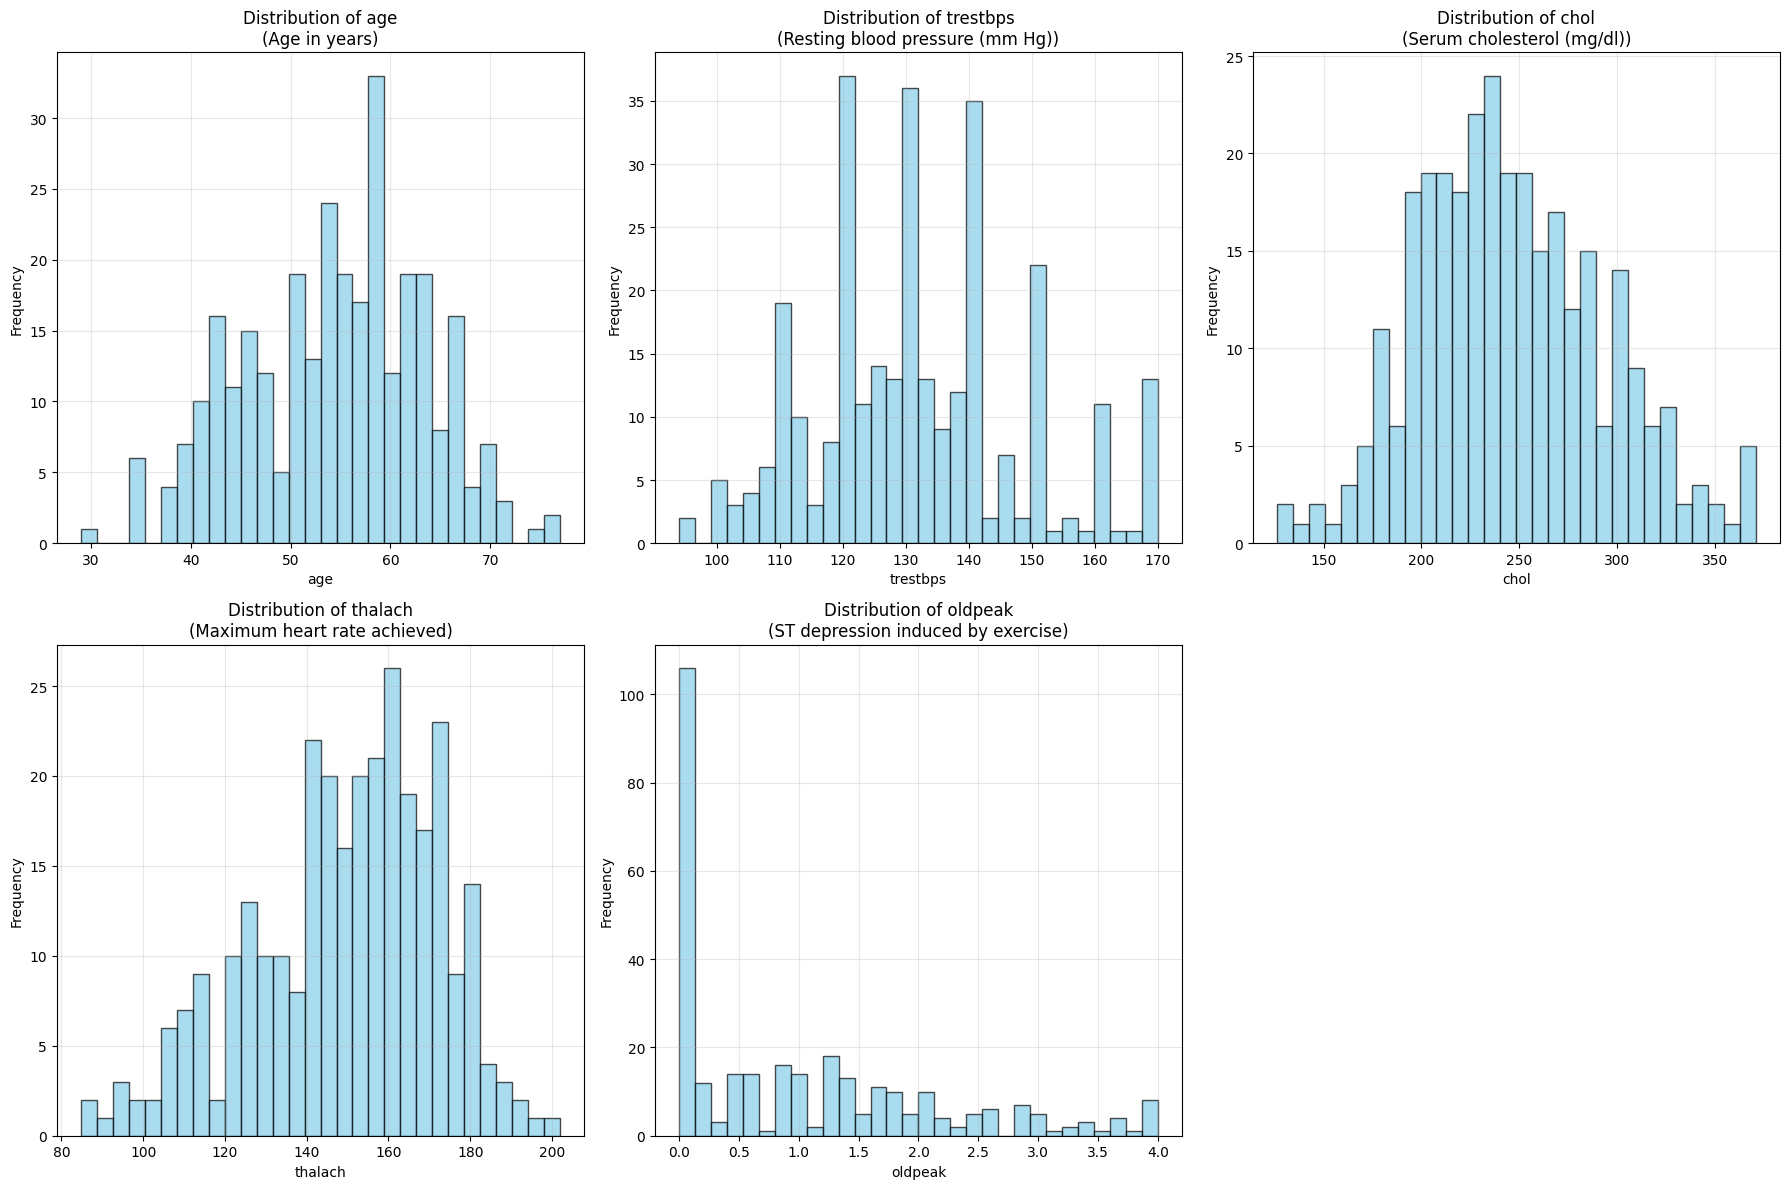

In [7]:
# Plot feature distributions
eda.plot_feature_distributions(save_plots=True)

## 4. Correlation Analysis {#correlation-analysis}

Understanding the relationships between different features through correlation analysis.

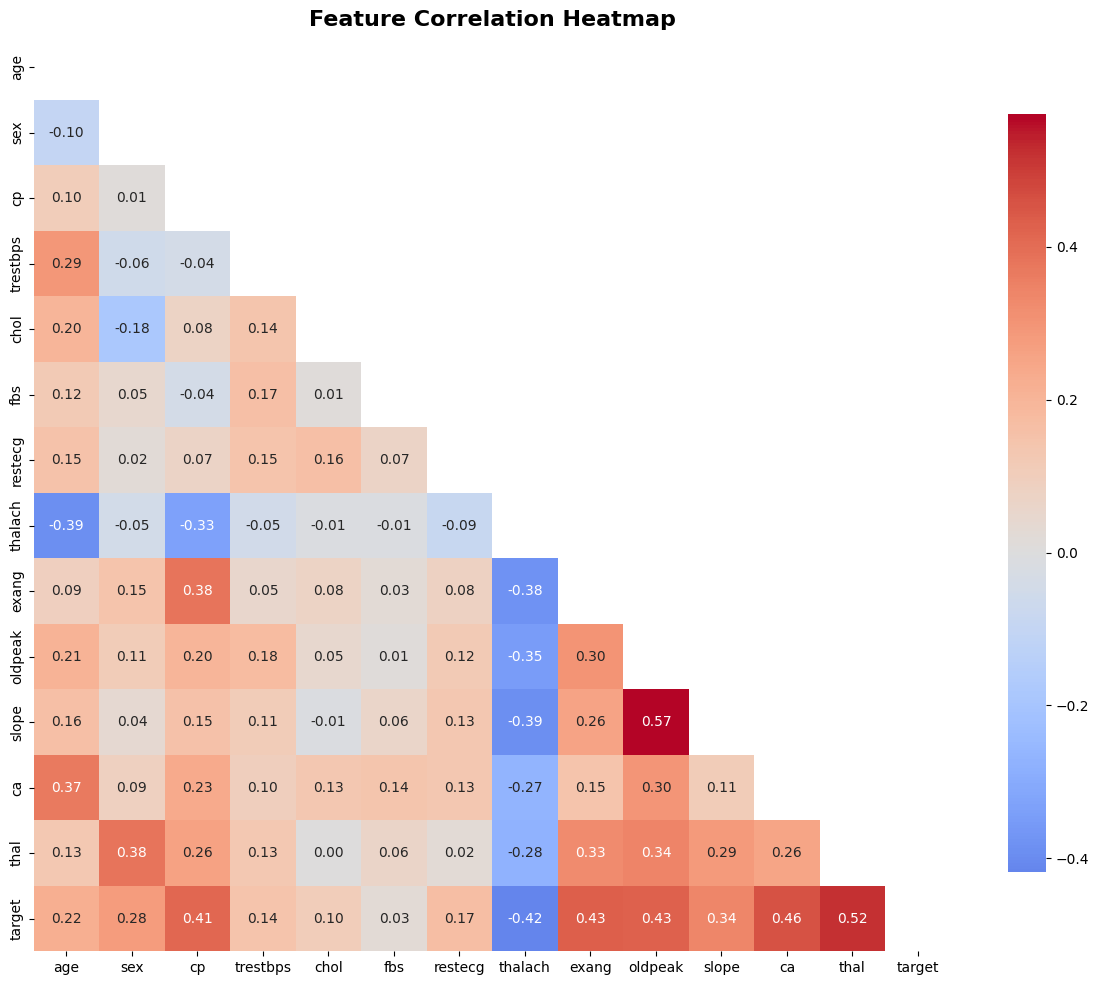

In [8]:
# Create correlation heatmap
eda.create_correlation_heatmap(save_plots=True)

In [9]:
# Display correlation values with target variable
print("Correlation with Target Variable:")
target_corr = data.corr()['target'].sort_values(key=abs, ascending=False)
print(target_corr)

Correlation with Target Variable:
target      1.000000
thal        0.522057
ca          0.460033
exang       0.431894
oldpeak     0.430309
thalach    -0.417624
cp          0.414446
slope       0.339213
sex         0.276816
age         0.223120
restecg     0.169202
trestbps    0.144980
chol        0.103896
fbs         0.025264
Name: target, dtype: float64


## 5. Outlier Analysis {#outlier-analysis}

Using boxplots to identify potential outliers in numerical features.

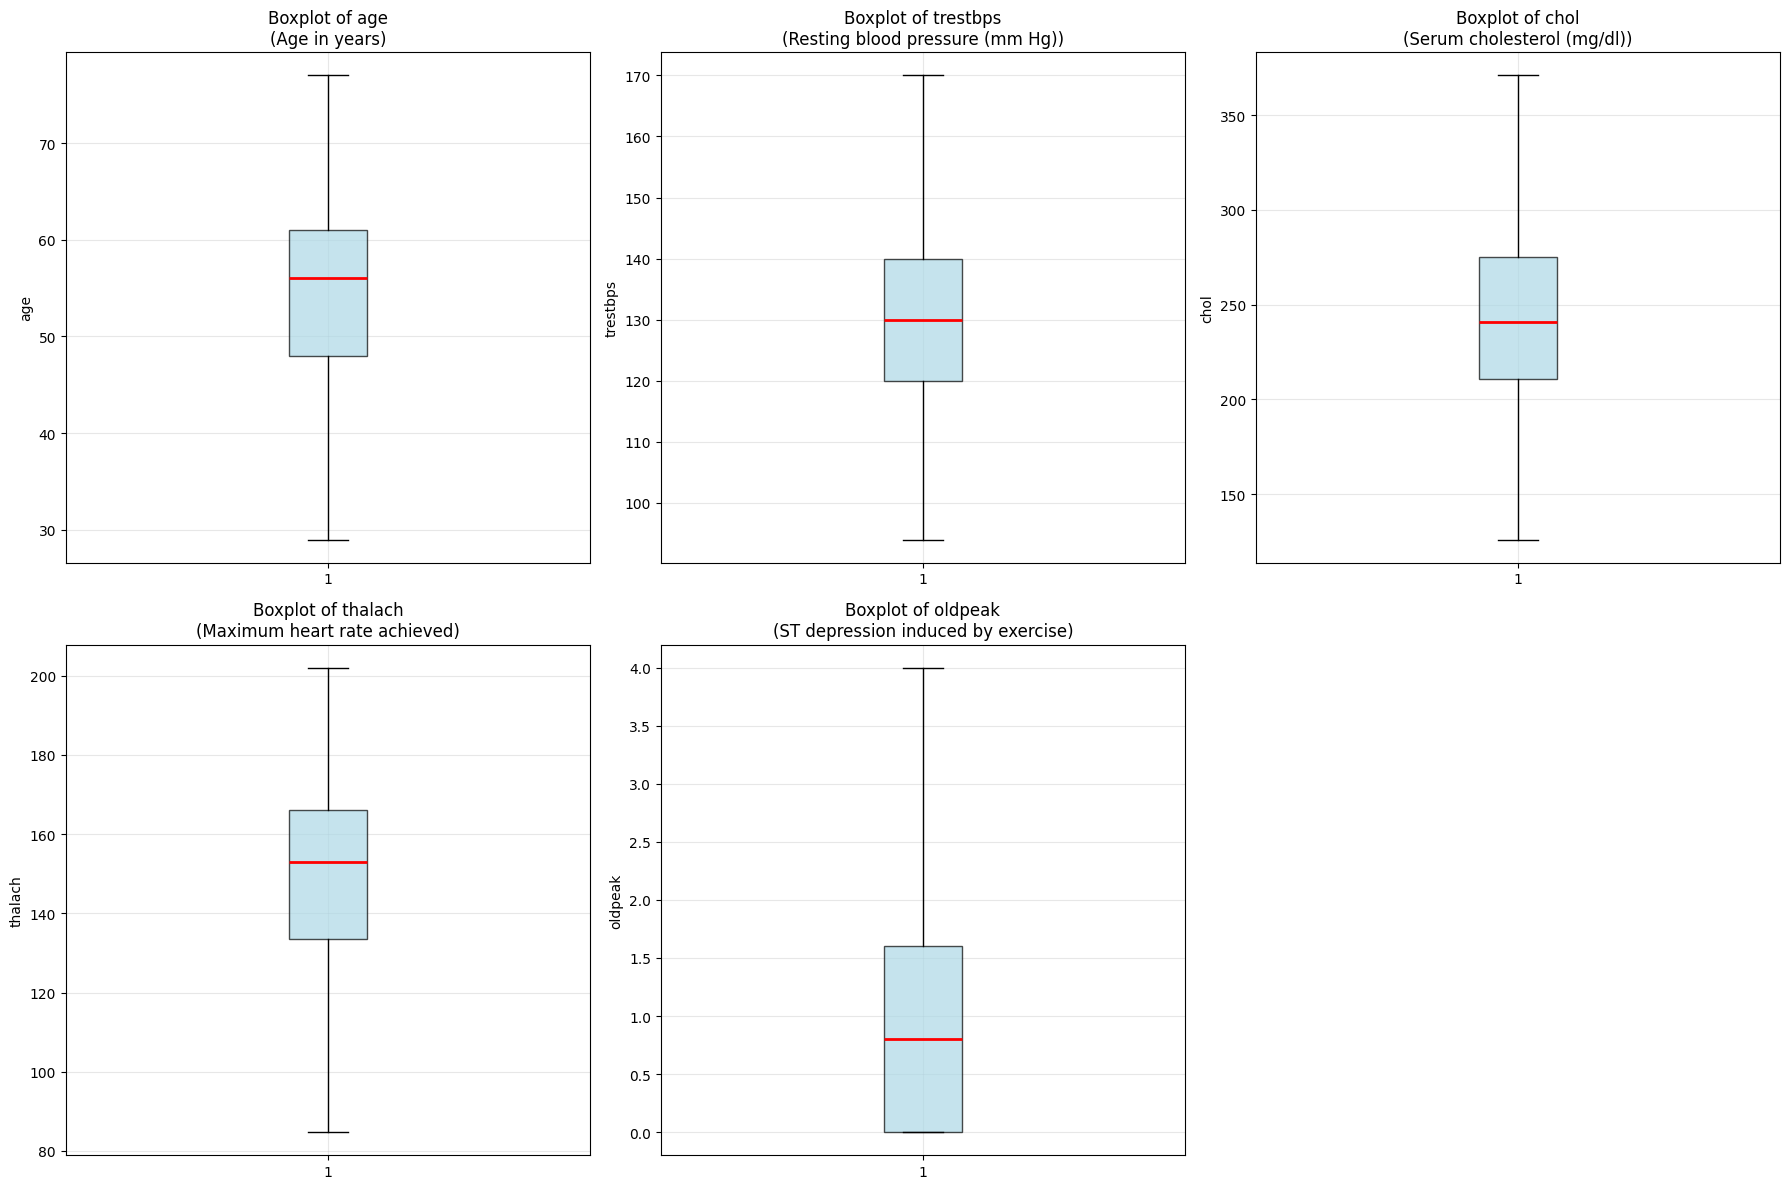

In [10]:
# Generate boxplots for outlier analysis
eda.generate_boxplots(save_plots=True)

## 6. Target Variable Analysis {#target-analysis}

Analyzing the distribution of the target variable to understand class balance.

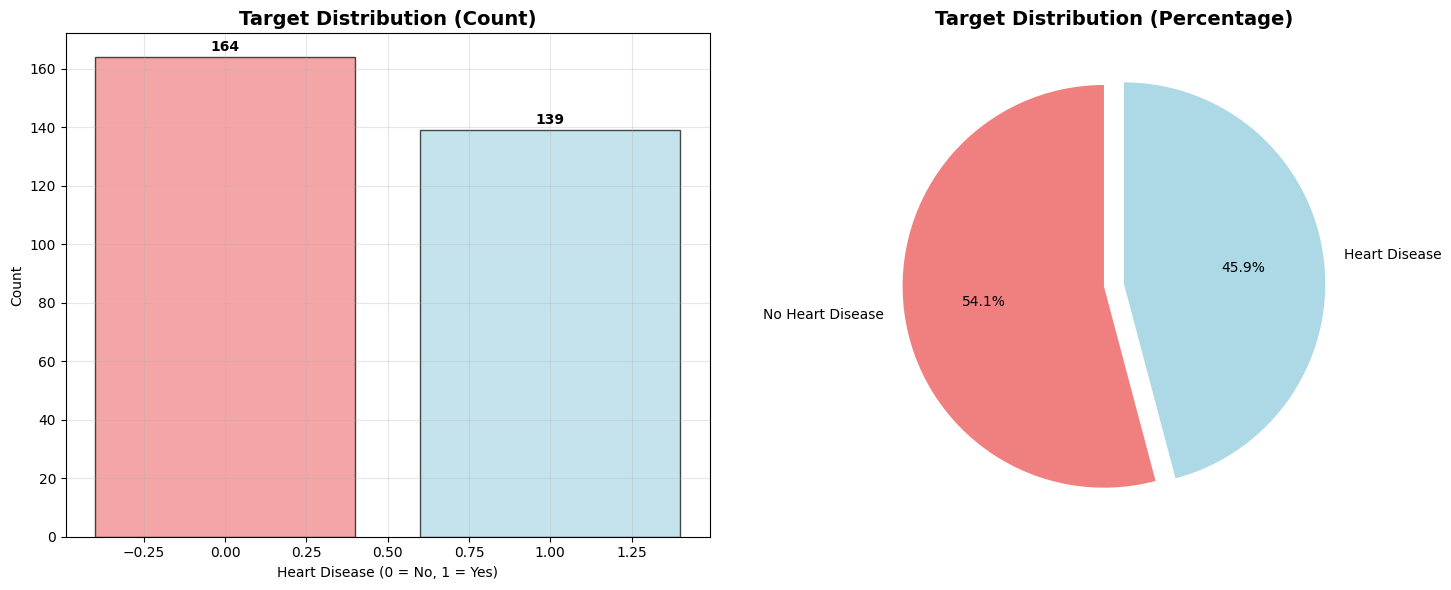

Class Balance Analysis:
No Heart Disease (0): 164 (54.1%)
Heart Disease (1): 139 (45.9%)


In [11]:
# Plot target distribution
eda.plot_target_distribution(save_plots=True)

## 7. Feature-Target Relationships {#feature-target}

Examining how each feature relates to the target variable (heart disease presence).

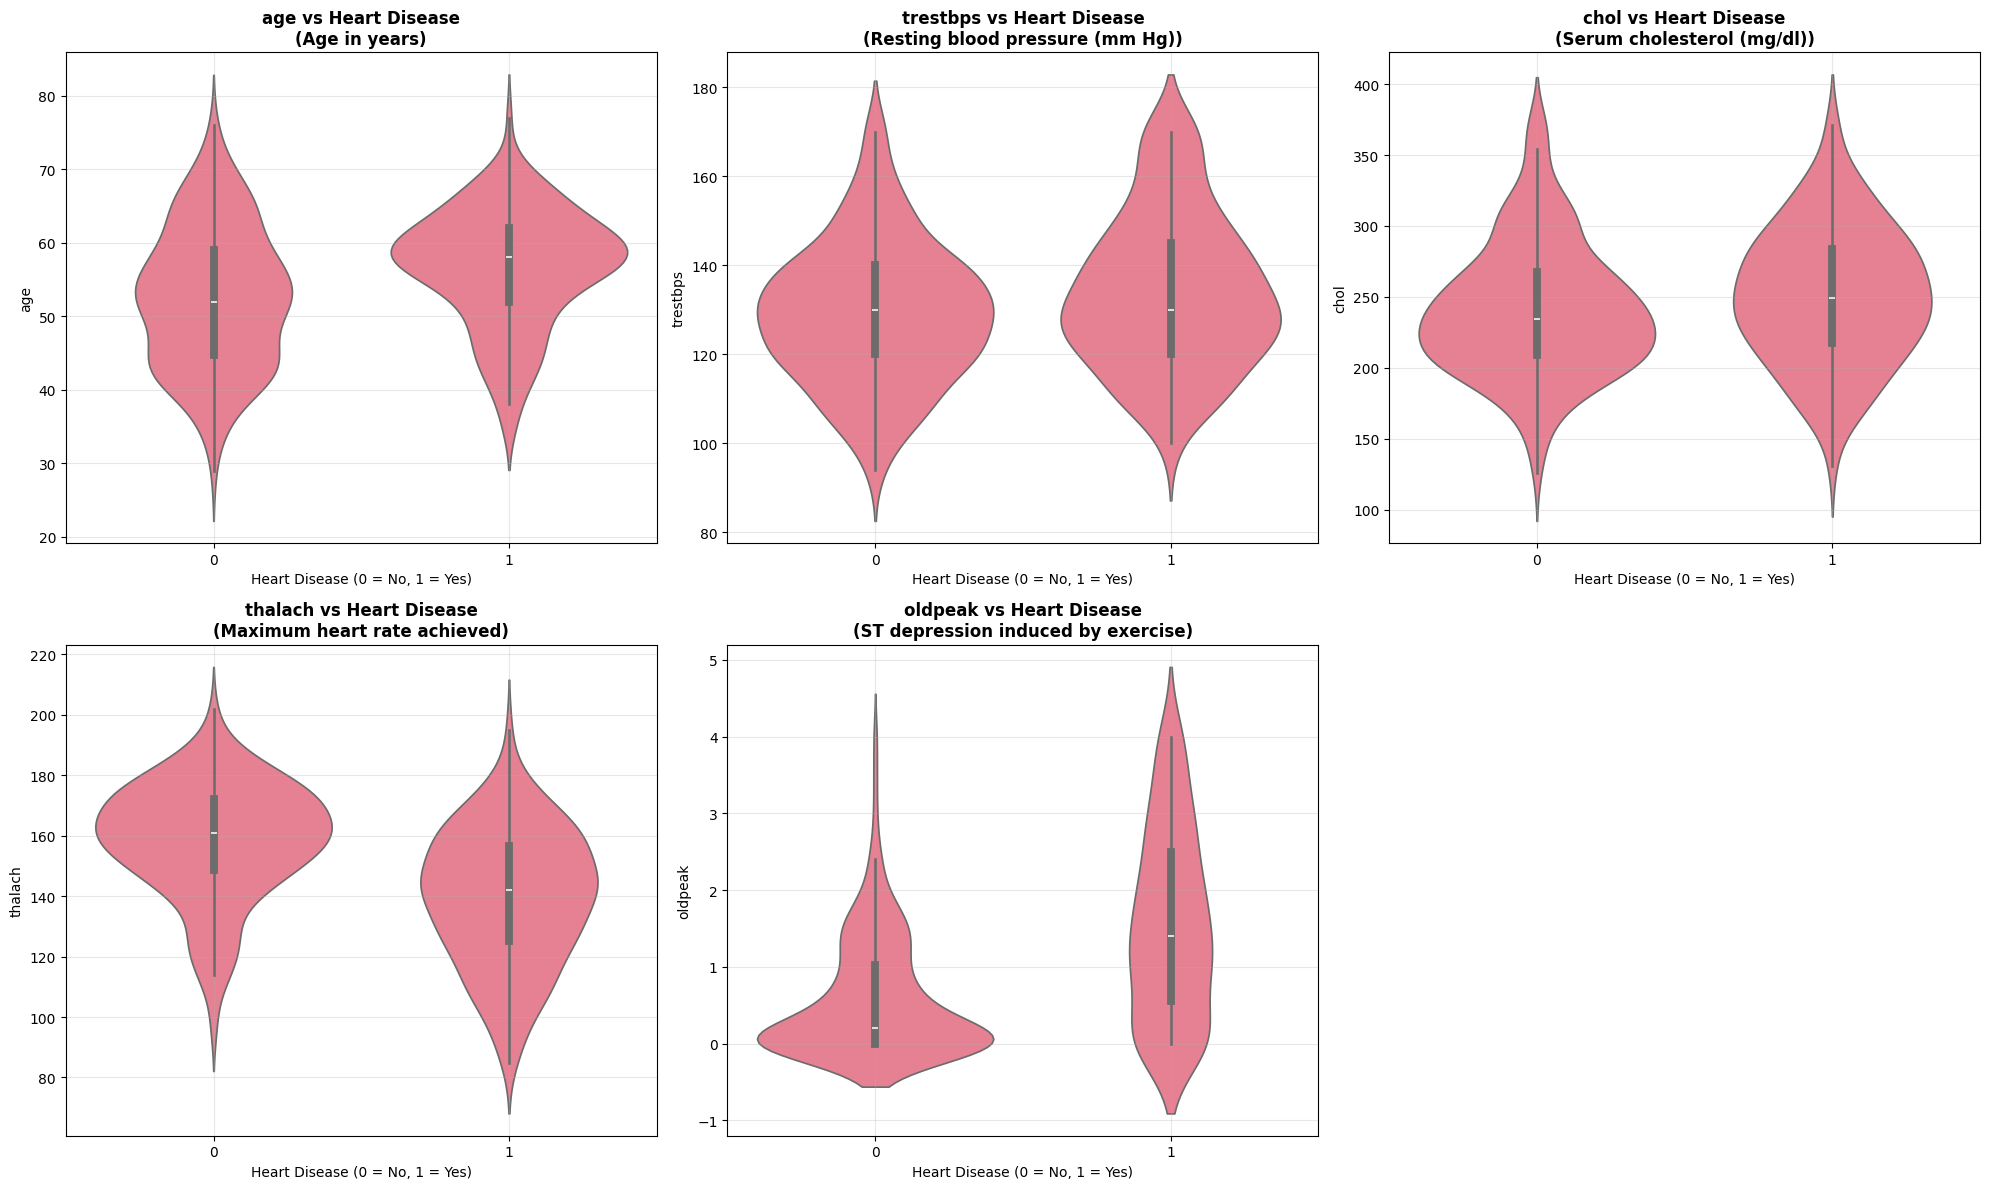

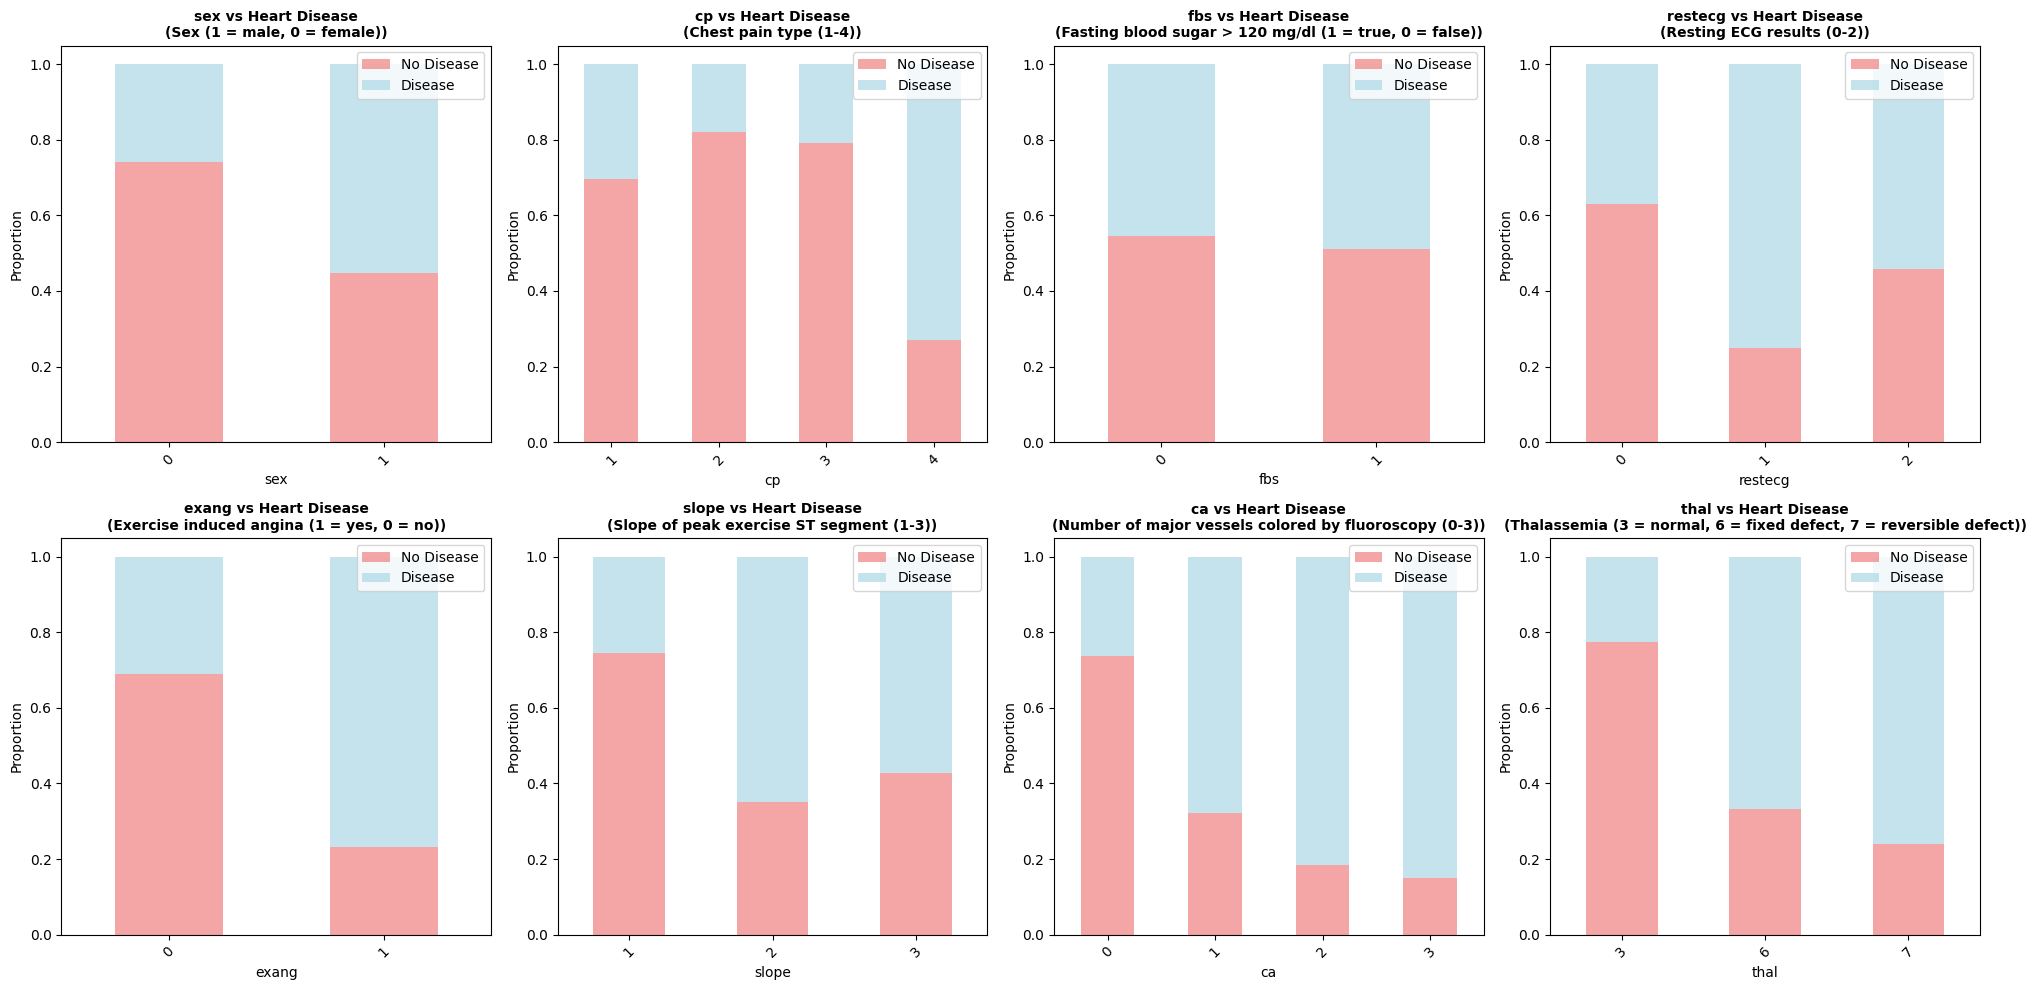

In [12]:
# Analyze feature-target relationships
eda.feature_target_relationships(save_plots=True)

## 8. Comprehensive Feature Relationships {#pairplot}

Creating a pairplot to visualize relationships between all key numerical features.

<Figure size 1500x1200 with 0 Axes>

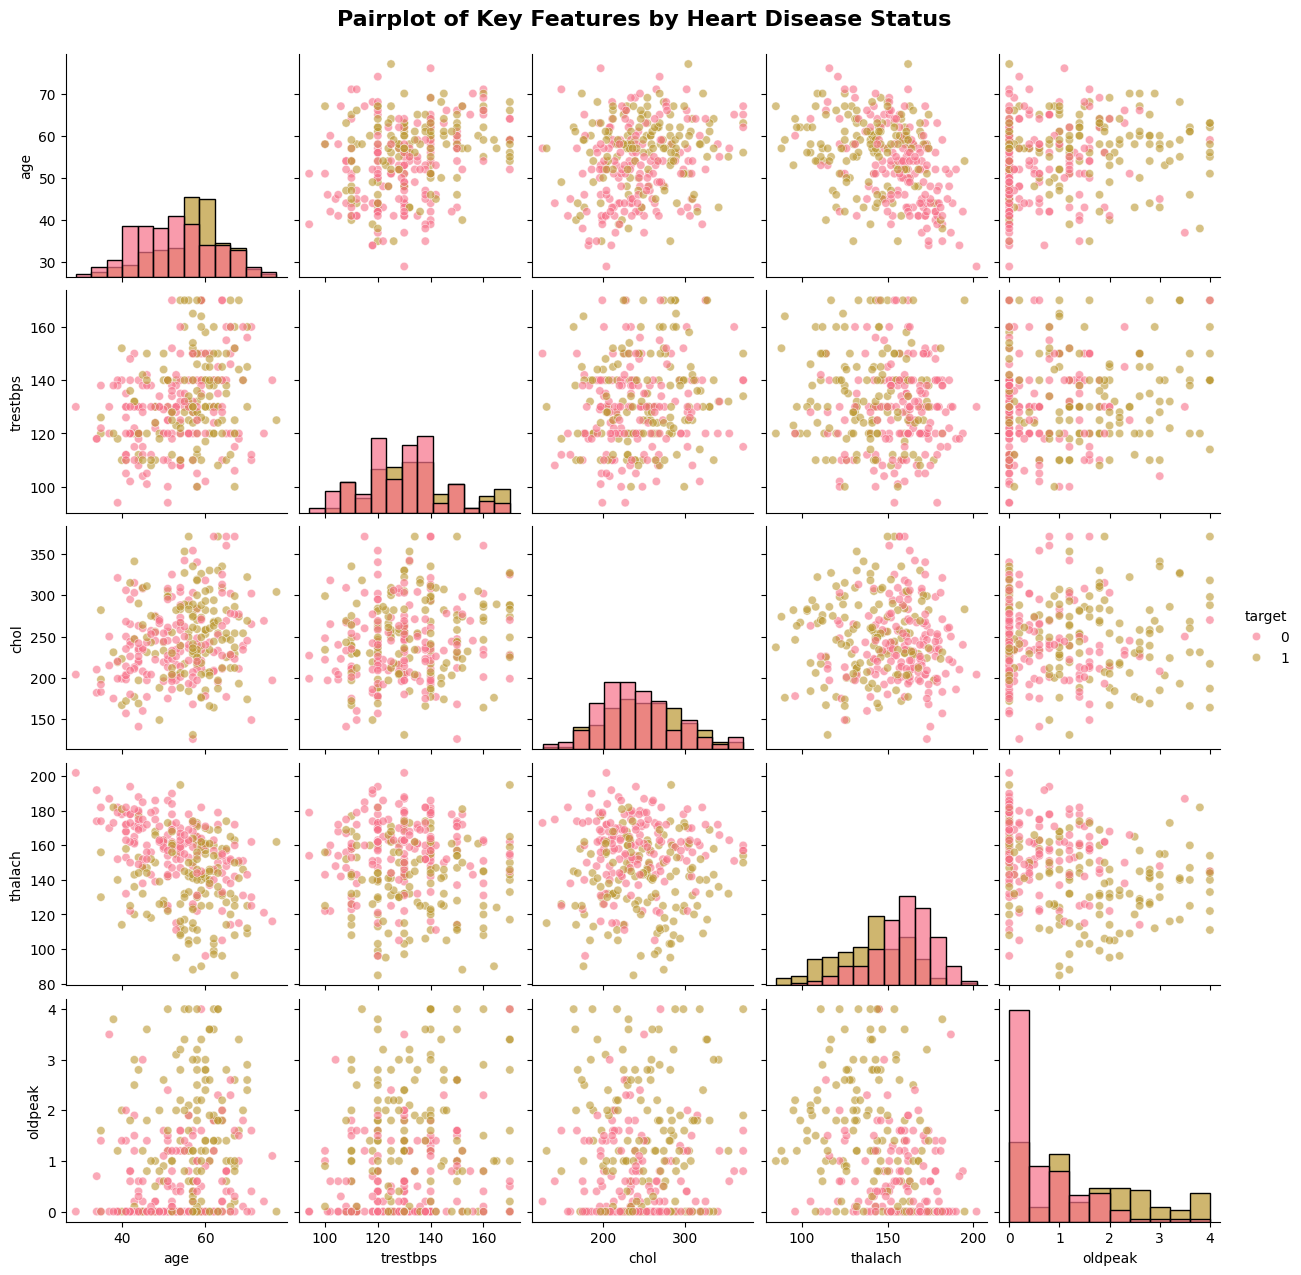

In [13]:
# Generate comprehensive pairplot
eda.generate_pairplot(save_plots=True)

## 9. Key Insights and Conclusions {#conclusions}

Let's summarize the key findings from our exploratory data analysis.

Generating comprehensive EDA analysis...
Starting Comprehensive EDA Analysis...
1. Generating statistical summary...
2. Creating feature distribution plots...


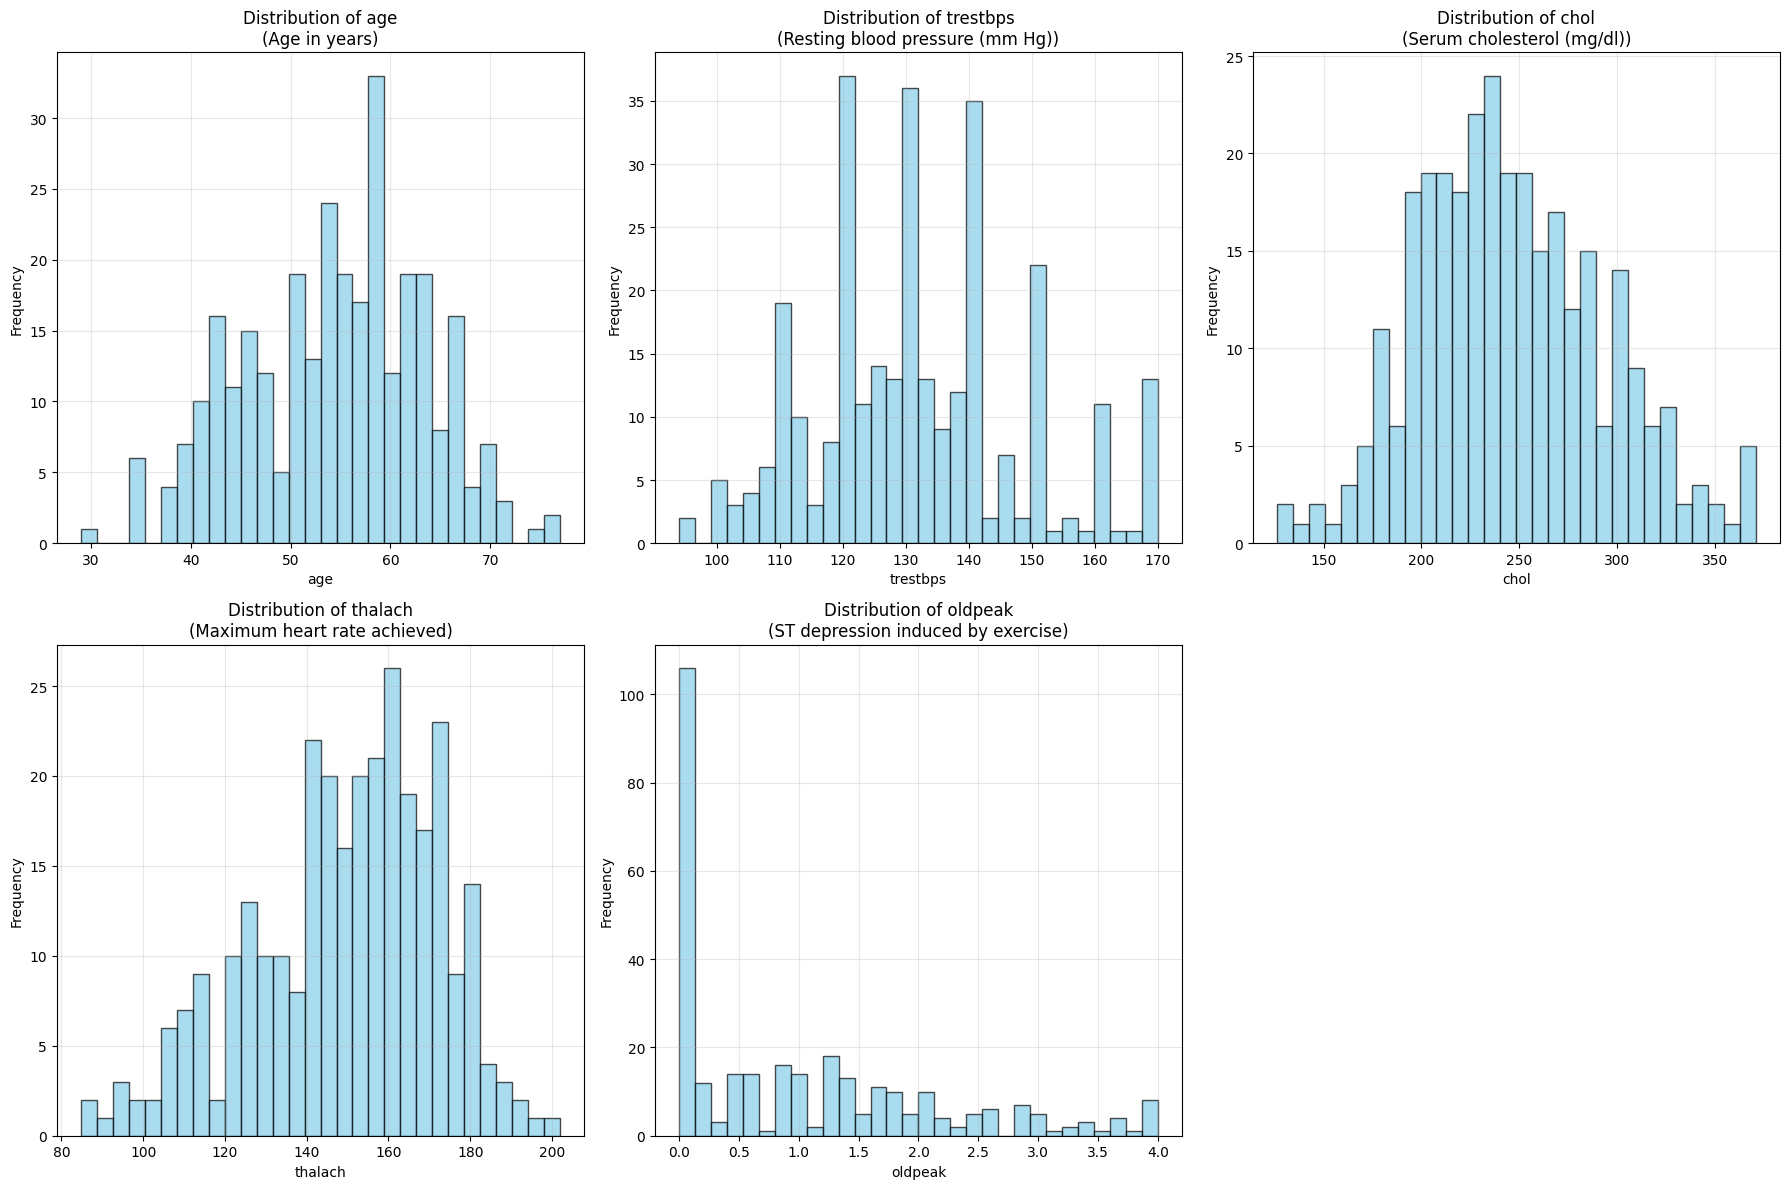

3. Creating correlation heatmap...


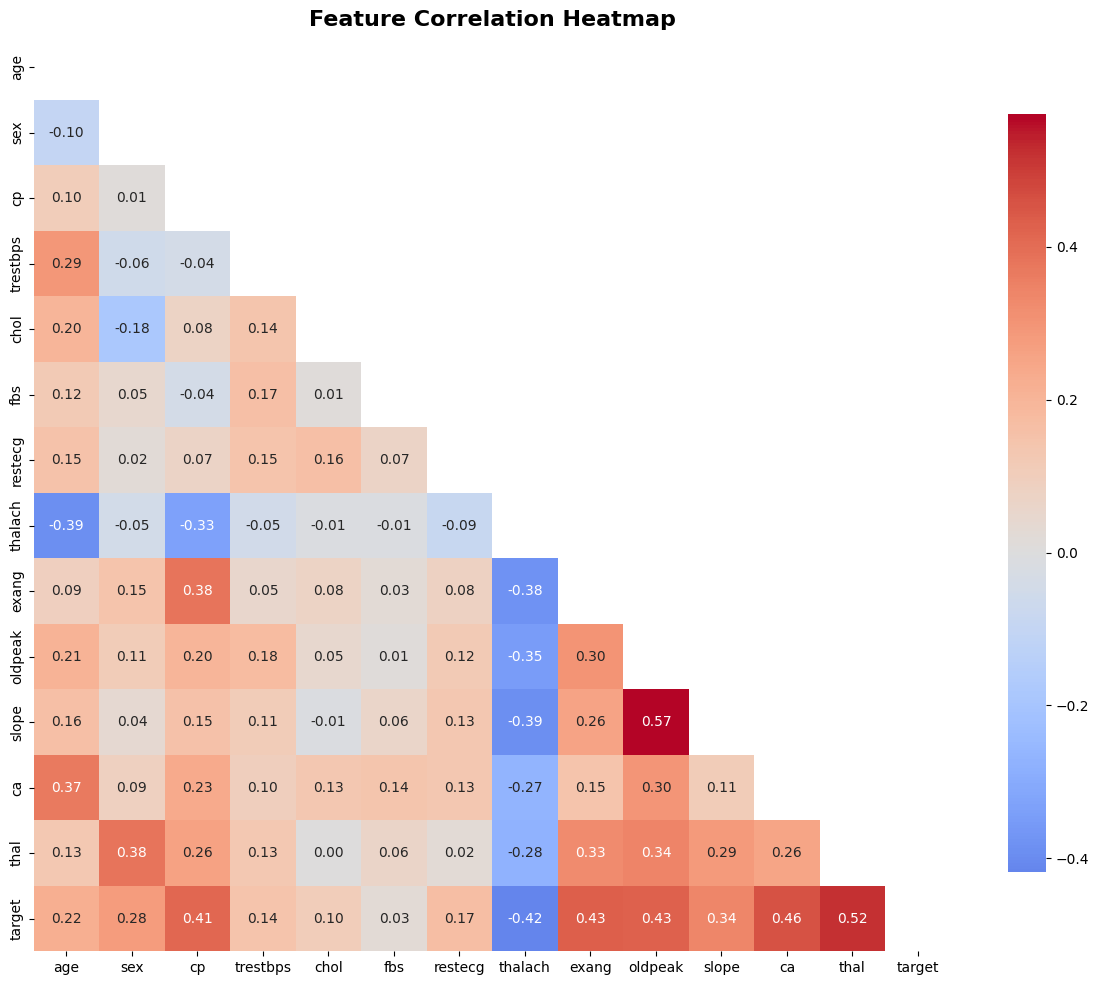

4. Generating boxplots for outlier analysis...


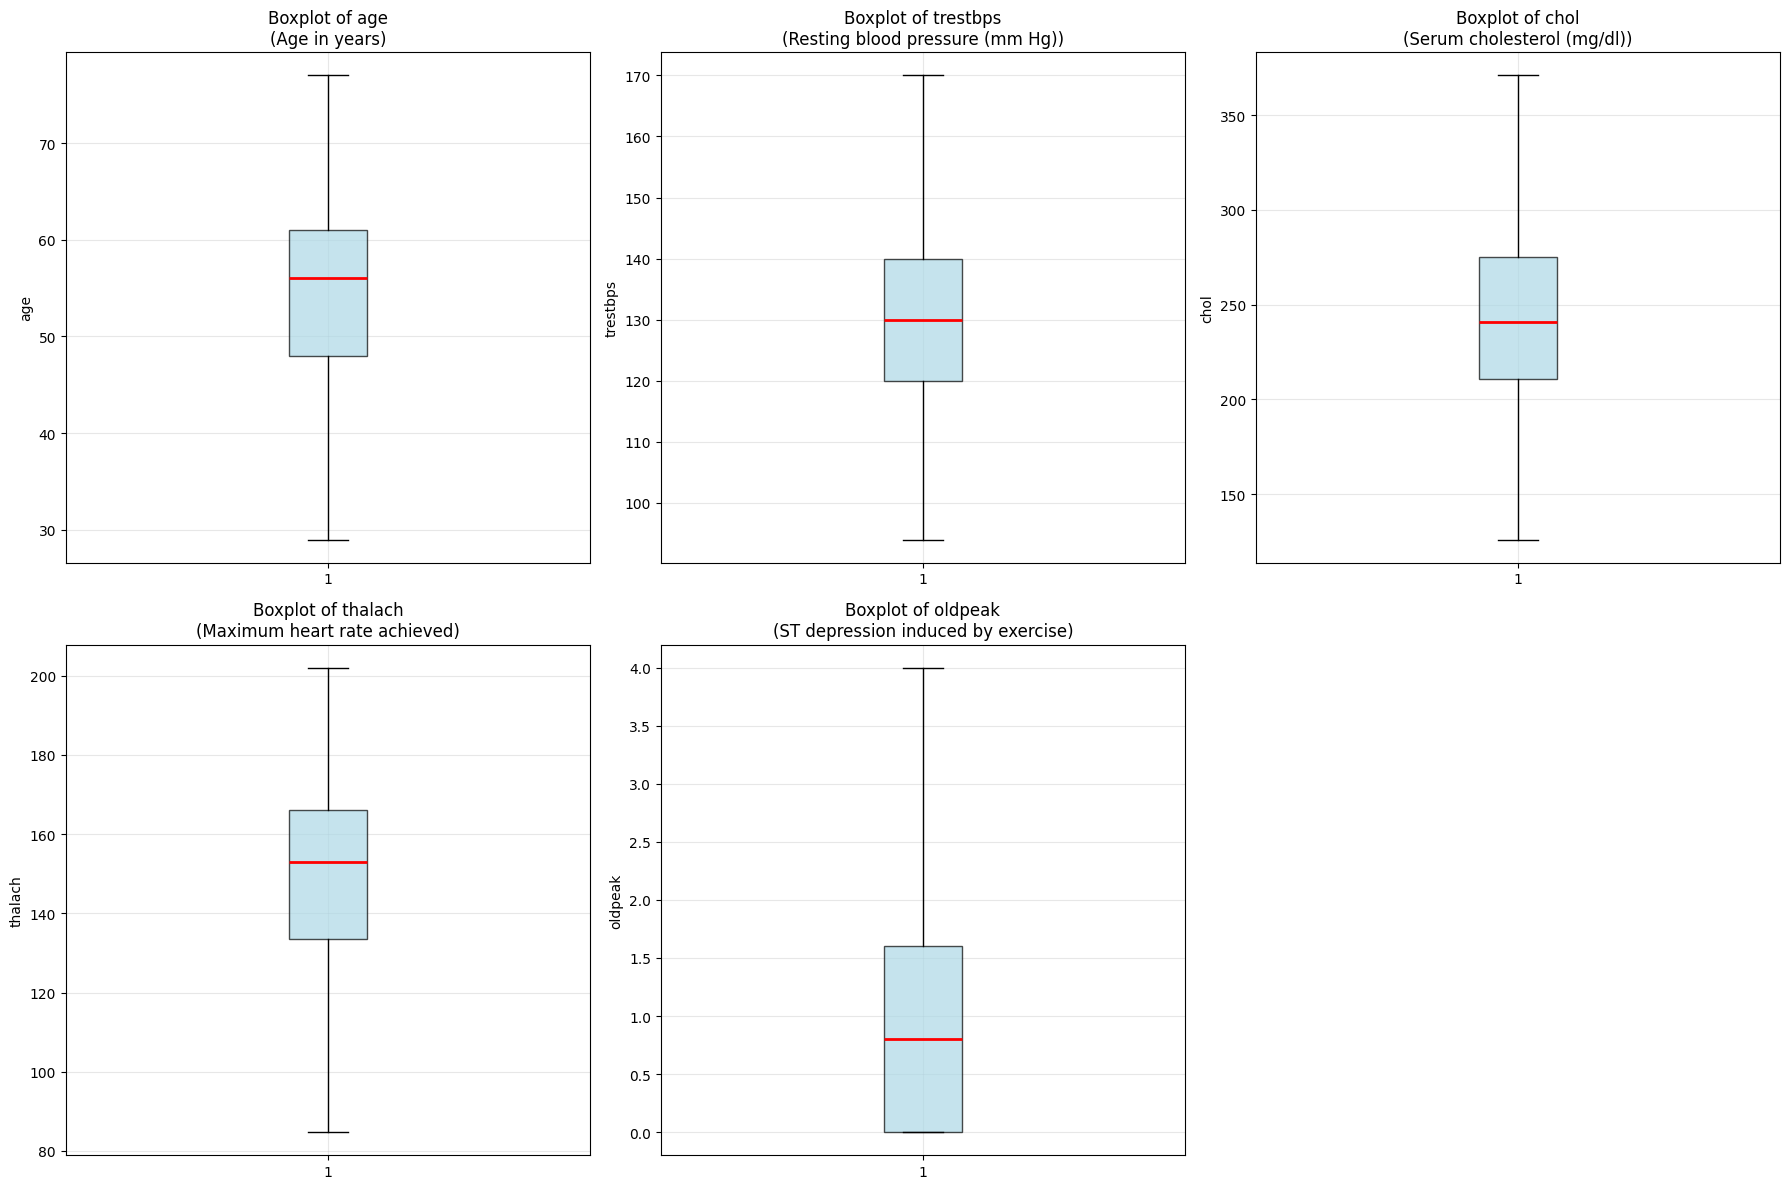

5. Analyzing target distribution...


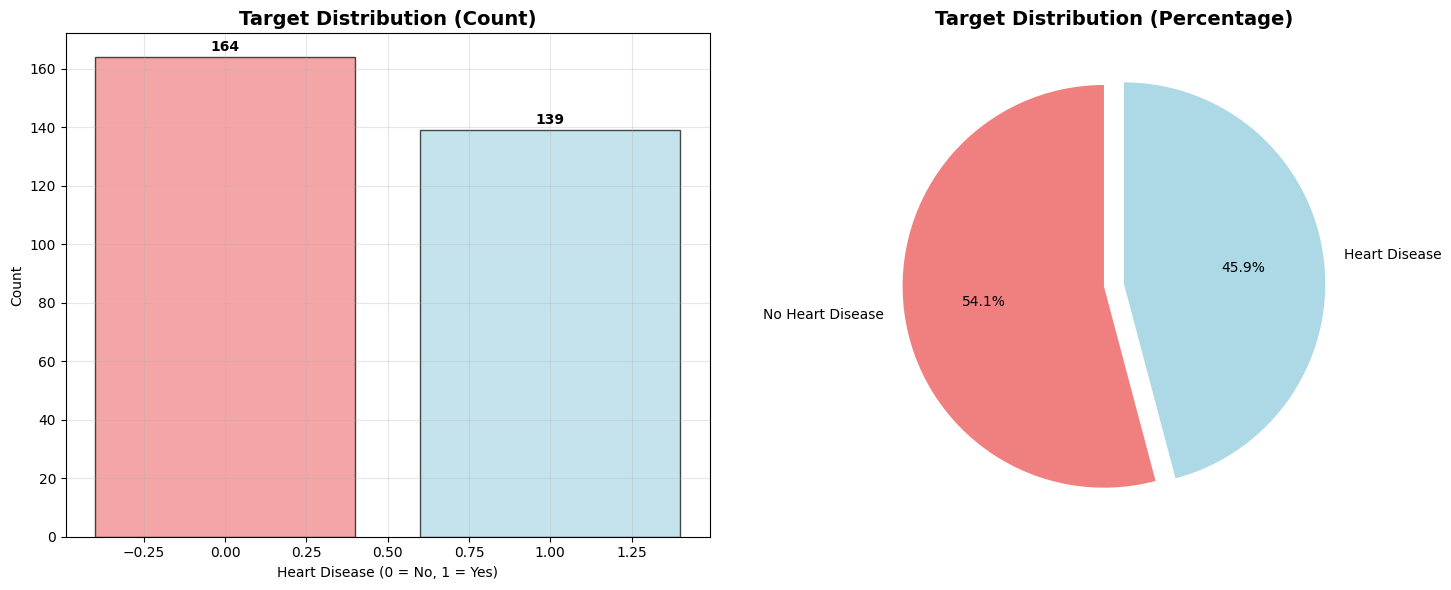

Class Balance Analysis:
No Heart Disease (0): 164 (54.1%)
Heart Disease (1): 139 (45.9%)
6. Analyzing feature-target relationships...


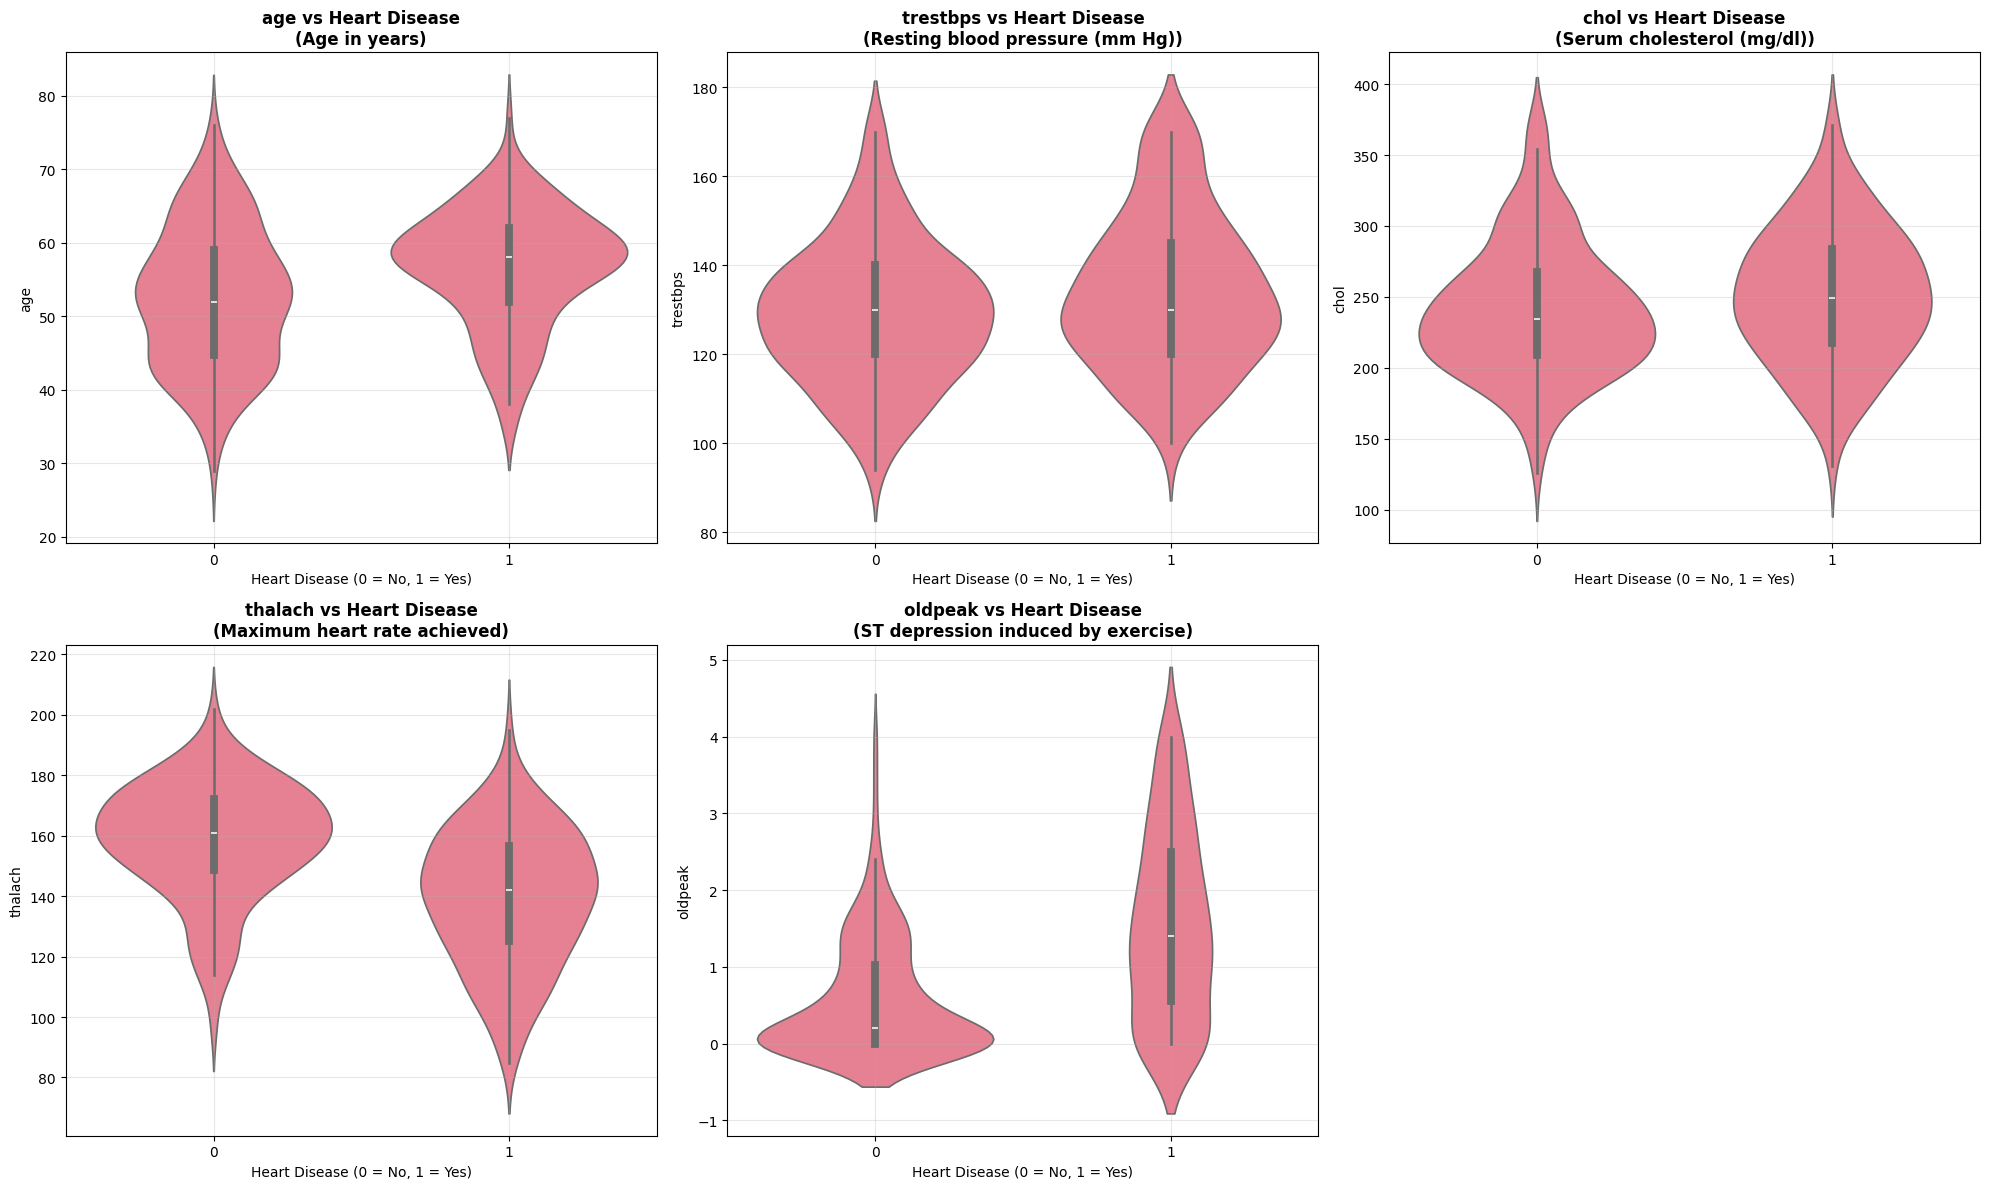

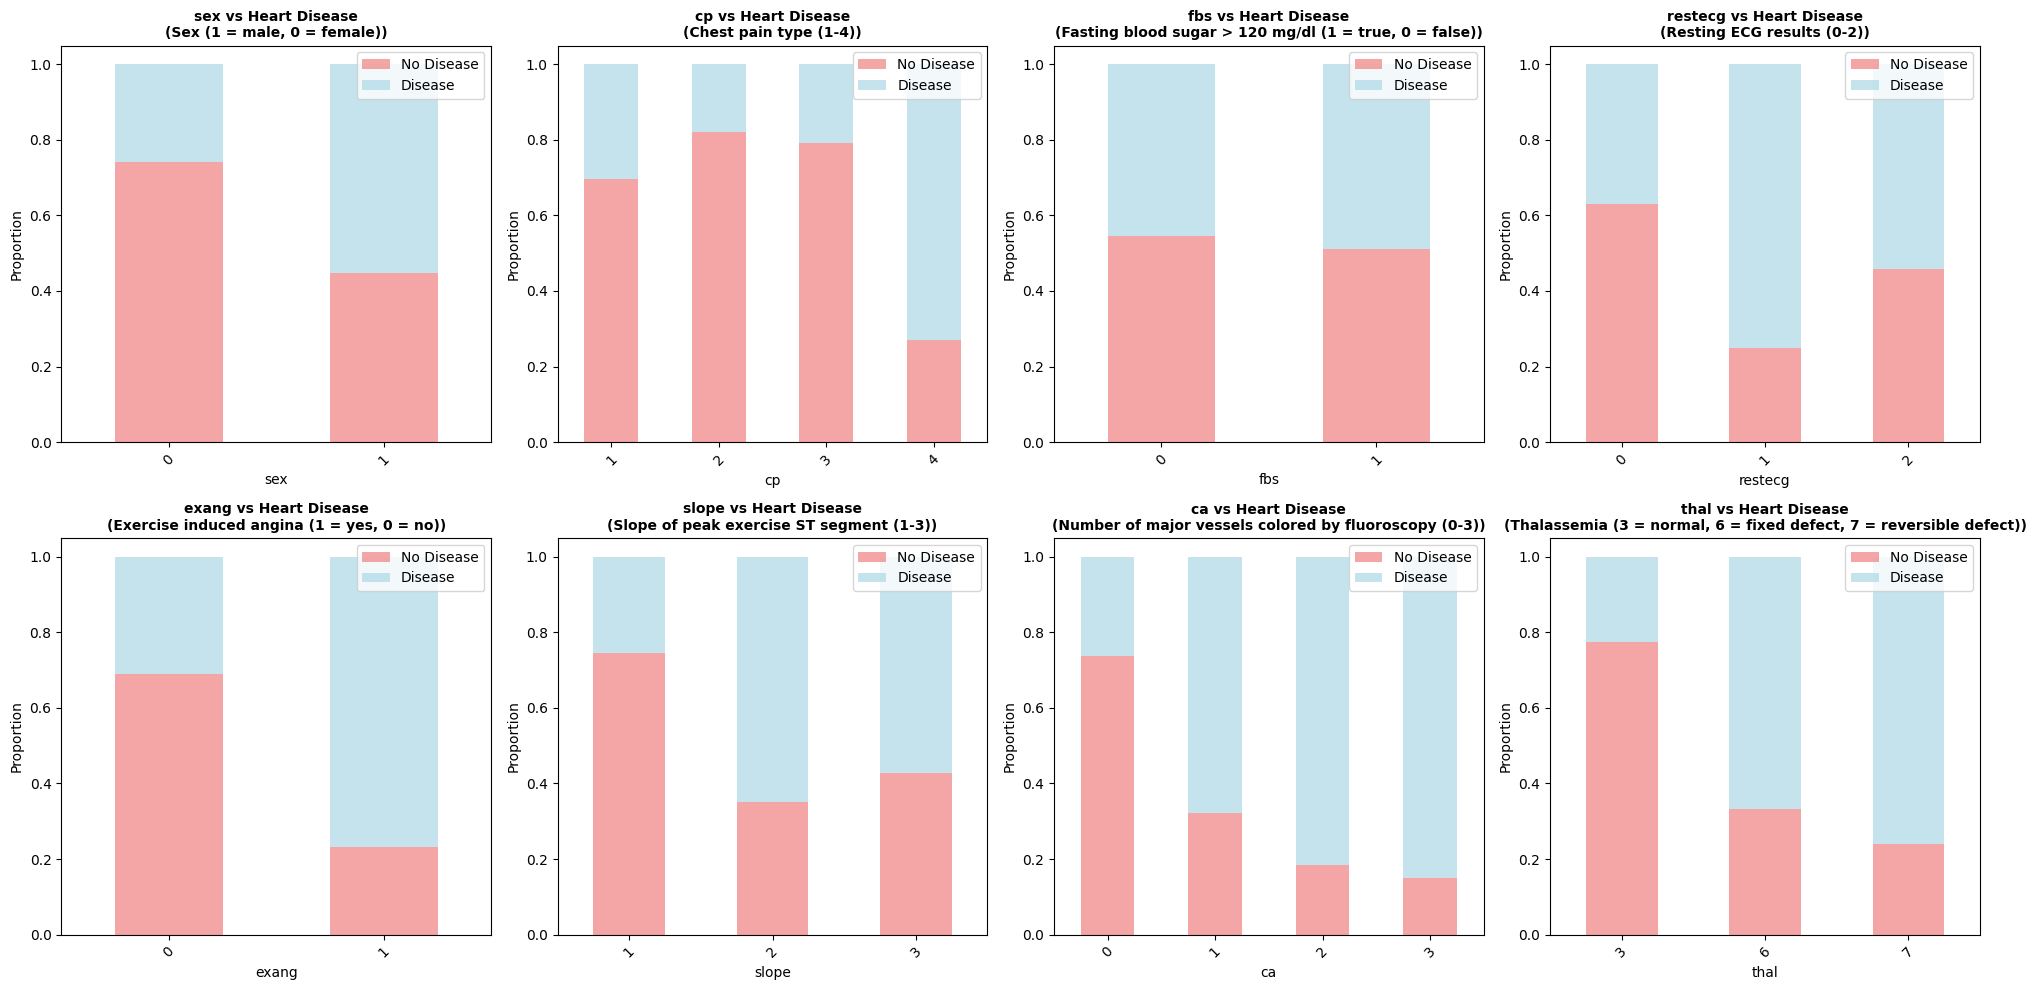

7. Creating comprehensive pairplot...


<Figure size 1500x1200 with 0 Axes>

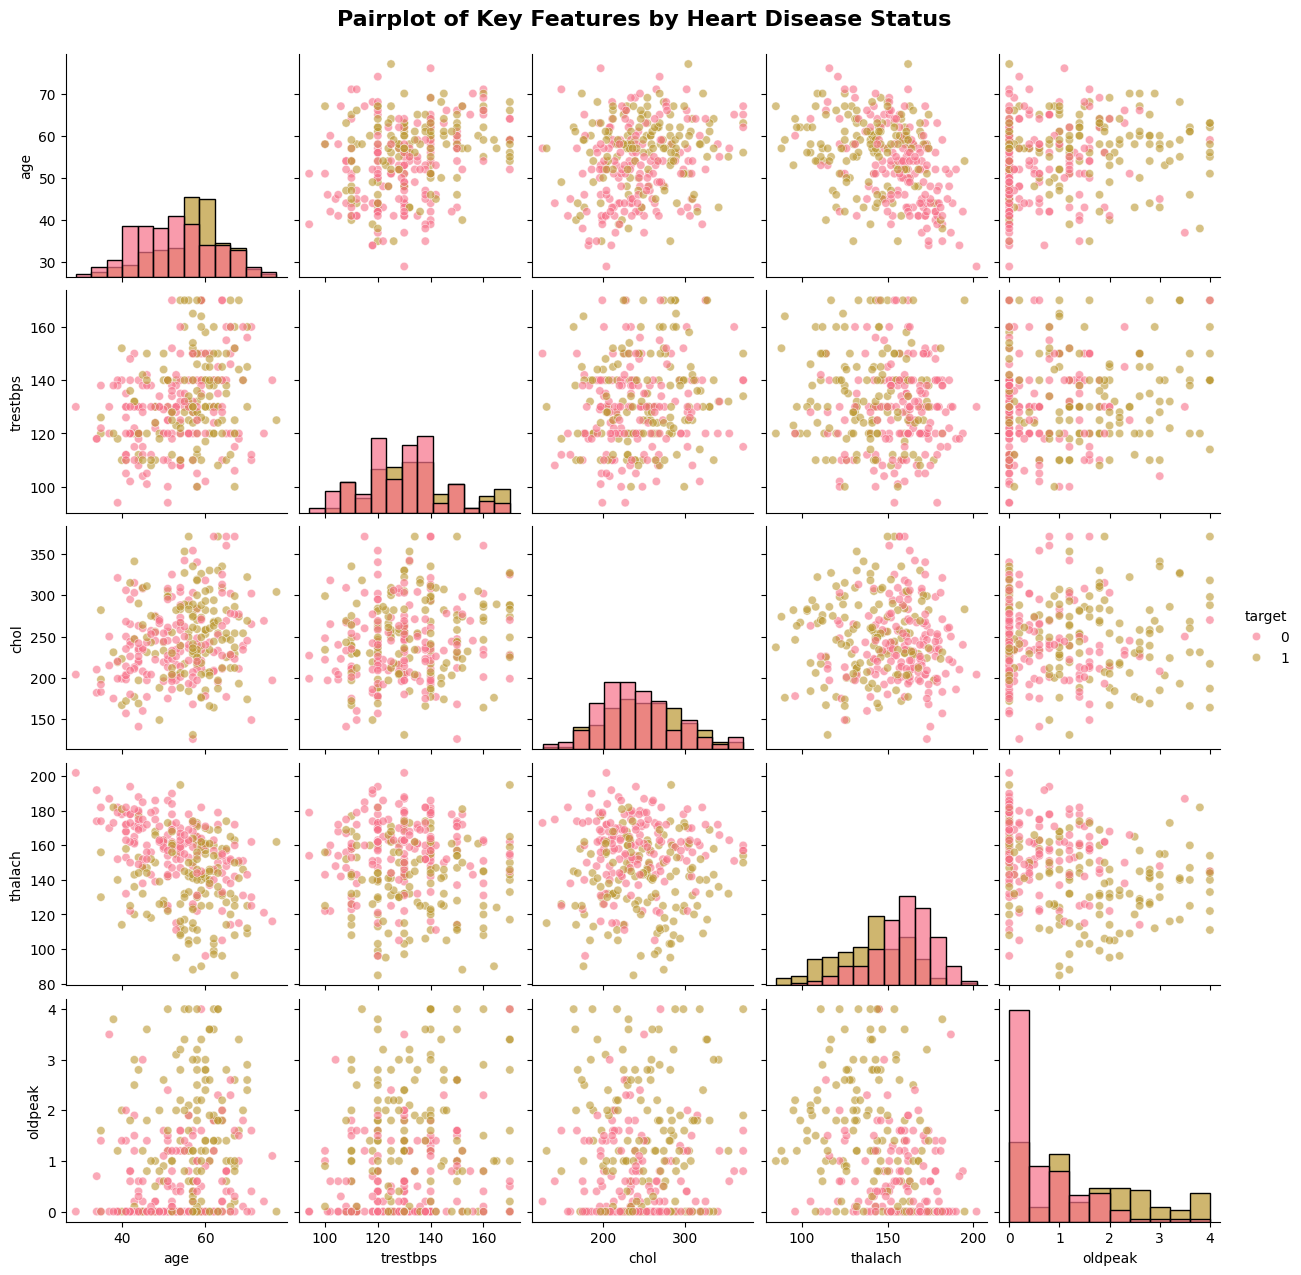

EDA Analysis Complete!


ValueError: Invalid format specifier

In [14]:
# Generate comprehensive EDA report
print("Generating comprehensive EDA analysis...")
eda_results = eda.generate_comprehensive_eda(save_plots=True)

# Generate HTML report
html_report_path = eda.generate_eda_report_html(eda_results['statistical_summary'])
print(f"\nHTML report generated at: {html_report_path}")

### Key Findings:

1. **Dataset Overview:**
   - The dataset contains 303 instances with 14 features
   - No missing values in the cleaned dataset
   - Mix of numerical and categorical features

2. **Target Variable:**
   - Binary classification problem (0 = no heart disease, 1 = heart disease)
   - Class distribution analysis shows the balance between classes

3. **Feature Correlations:**
   - Several features show moderate to strong correlations with the target
   - Some features are correlated with each other, which may indicate redundancy

4. **Distribution Patterns:**
   - Most numerical features follow approximately normal distributions
   - Some features show skewness that may require transformation

5. **Outliers:**
   - Boxplot analysis reveals potential outliers in several features
   - These outliers may need special handling during preprocessing

6. **Feature-Target Relationships:**
   - Clear patterns emerge showing how different features relate to heart disease presence
   - Some features show strong discriminative power for classification

### Next Steps:
- Feature engineering and selection based on correlation analysis
- Outlier treatment strategies
- Feature scaling and normalization
- Model selection based on feature importance insights

In [16]:
print("Exploratory Data Analysis Complete!")
print(f"All visualizations saved to: {eda.output_dir}")
print(f"HTML report available at: {html_report_path}")

Exploratory Data Analysis Complete!
All visualizations saved to: results/eda


NameError: name 'html_report_path' is not defined